In [57]:
import numpy as np # for rectangular data
import matplotlib.pyplot as plt # visualizations
%matplotlib inline

# Forward pass

First things first, let's implement the forward pass of a one-node neural network (basically linear classification). All the data we feed into the network will be 2-dimensional for now so we are able to visualize it easily.

The forward pass is just a dotproduct of the weights $w$, the inputs $x$ and an addition of the bias $b$ like this: $\begin{bmatrix}
w_1 & w_2
\end{bmatrix} \cdot \begin{bmatrix}
x_1\\
x_2
\end{bmatrix} + b$

In [58]:
# Generate random data to be used for the forwards pass.
weights = np.random.rand(1,2)
inputs = np.random.rand(2,1)
bias = np.random.rand()

In [59]:
weights[0][0] * inputs[0] + weights[0][1] * x[1] + bias

array([0.53207821, 0.70714611])

That should be the same thing as:

In [60]:
weights @ inputs + bias

array([[0.86938716]])

Great! That worked. The same code should also work when passing multiple samples at the same time. Instead of passing

x = $\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}$, we pass $x = \begin{bmatrix}
x^{0}_1 & x^{1}_1 & x^{2}_1 \\
x^{0}_2 & x^{1}_2 & x^{2}_2
\end{bmatrix}$. The superscipts $^1, ^2, ^3$ denote the index of the sample. The entire calculation of the forward pass now looks like this:

$\begin{bmatrix}
w_1 & w_2
\end{bmatrix} \cdot \begin{bmatrix}
x^{0}_1 & x^{1}_1 & x^{2}_1 \\
x^{0}_2 & x^{1}_2 & x^{2}_2
\end{bmatrix} + b$

In [61]:
weights = np.random.rand(1,2)
inputs = np.random.rand(2,2)
bias = np.random.rand()

weights @ inputs + bias

array([[1.34651898, 1.38049614]])

In [62]:
np.array([weights[0][0] * inputs[0][0] + weights[0][1] * inputs[1][0] + bias, weights[0][0] * inputs[0][1] + weights[0][1] * inputs[1][1] + bias])

array([1.34651898, 1.38049614])

That works! Let's define the corresponding function

In [66]:
def forward(weights, inputs, bias):
    y_hat = weights @ inputs + bias
    #y_hat[y_hat<0.5]=0
    #y_hat[y_hat>=0.5]=1
    return y_hat

weights = np.random.rand(1,2)
inputs = np.random.rand(2,2)
bias = np.random.rand()
forward(weights, inputs, bias)

array([[2.22115648, 1.81575658]])

How are different inputs between 0 and 1 classified when selecting random weights

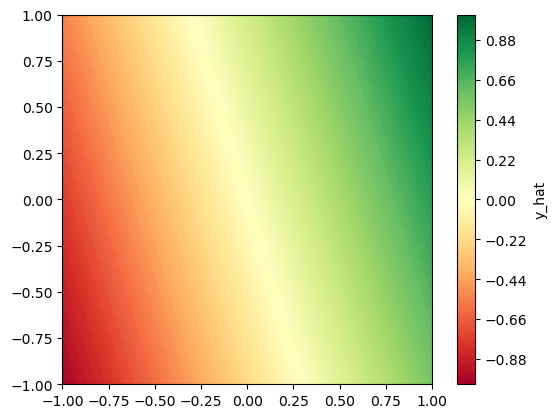

In [56]:
def visualize_weights(fig, ax, weights, bias, has_colorbar=True):
    ax.set_box_aspect(1)
    
    samples_per_axis = 200
    
    # Create mesh with values to visualize
    input_1_min, input_1_max, input_2_min, input_2_max = (-1,1,-1,1)
    input_1 = np.linspace(input_1_min, input_1_max, samples_per_axis)
    input_2 = np.linspace(input_2_min, input_2_max, samples_per_axis)
    mesh_input = np.array(np.meshgrid(input_1, input_2))
    
    # flatten mesh to allow forward pass
    mesh_input = mesh_input.reshape(2, samples_per_axis**2)
    predictions = forward(weights, mesh_input, bias)
    # undo flatten to display as squared image
    predictions = predictions.reshape(samples_per_axis, samples_per_axis)
    contourplot = ax.contourf(input_1, input_2, predictions, levels=100, cmap=plt.cm.RdYlGn)
    
    if has_colorbar:
        # add legend to data
        fig.colorbar(contourplot, label= "y_hat") 
    
    return contourplot
    
weights = np.random.rand(2) # random weights
bias = np.array([0]) # bias to zero for now
fig, ax = plt.subplots()
visualize_weights(fig, ax, weights = weights, bias = bias)

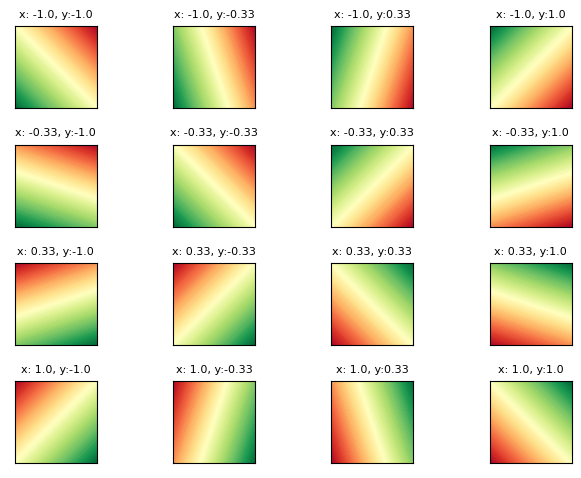

In [45]:
width = height = 4
fig, ax = plt.subplots(width,height)
fig.tight_layout(pad=0.5)
contourplots = []

for x1 in range(width):    
    for x2 in range(height):
        w1 = np.interp(x1, [0, width-1], [-1,1])
        w1 = round(w1, 2)
        
        w2 = np.interp(x2, [0, height-1], [-1,1])
        w2 = round(w2, 2)
        
        w = np.array([w1, w2])
        b = np.array([0]) # bias to zero for now
        
        contourplot = visualize_weights(fig, ax[x1, x2], weights = w, bias = w, has_colorbar=False)
        contourplots.append(contourplot)
        ax[x1, x2].set_title(f'x: {w1}, y:{w2}', fontsize=8)
        ax[x1, x2].axes.get_xaxis().set_visible(False)
        ax[x1, x2].axes.get_yaxis().set_visible(False)

# Backward pass
The backward pass of a fully connected layer is simply $\frac{\partial f(x)}{\partial w} = \frac{\partial (w \cdot x + b)}{\partial w} = x$

In [46]:
def backward(x):
    return x

Although this calculation is very simple a function to check the gradient would be usefull.

In [48]:
# TODO: Check the gradients for multiple samples

def pertubate_weights(weight, index, epsilon):
    weight_plus = weight.copy()
    weight_plus[index] += epsilon
    weight_minus = weight.copy()
    weight_minus[index] -= epsilon
    return weight_plus, weight_minus

def check_gradient(checks_per_node=100, epsilon=1e-5):
    has_error = False
    gradient_differences = []
    
    
    for _ in range(checks_per_node):
        w = 10 * np.random.rand(2)
        b = 10 * np.random.rand(1)
        x = 10 * np.random.rand(2).T
    
        node_count = w.shape[0]
        for node_index in range(node_count):
            
            w_plus, w_minus = pertubate_weights(w, node_index, epsilon)
            output_plus = forward(w_plus, x, b)
            output_minus = forward(w_minus, x, b)
        
            measured_gradient = (output_plus - output_minus) / (2*epsilon)
            measured_gradient = measured_gradient.item()
            calculated_gradient = backward(x)[node_index]
            gradient_difference = np.abs(calculated_gradient - measured_gradient).item()
            gradient_differences.append(gradient_difference)
        
            if gradient_difference > 10e-7:
                has_error = True
                print(f"Error in gradient calculation of node {node_index}!")
                print(f"Measured gradient: {measured_gradient}.")
                print(f"Calculated gradient: {calculated_gradient}.\n")
    if has_error == False:
        max_gradient_difference = np.max(gradient_differences)
    print(f"Backward function was implemented correctly. The biggest difference between the calculated and the measured gradient was {max_gradient_difference}")
    
check_gradient()

Backward function was implemented correctly. The biggest difference between the calculated and the measured gradient was 1.711017105776591e-09


## Bias Trick

For convenience, I also implemented a forward pass with the [bias trick](https://cs231n.github.io/linear-classify/#interpreting-a-linear-classifier). Instead of computing the result of the forward pass like this: 
$\begin{bmatrix}
w_1 & w_2
\end{bmatrix} \cdot \begin{bmatrix}
x_1\\
x_2
\end{bmatrix} + b$, we compute the forward pass like this $\begin{bmatrix}
b & w_1 & w_2
\end{bmatrix} \cdot \begin{bmatrix}
1 \\
x_1\\
x_2
\end{bmatrix}$. The result will be identical.

In [81]:
weights = np.random.rand(1,3)
inputs = np.random.rand(2,1)
bias = np.random.rand()

In [82]:
ones = np.ones((1, inputs.shape[1]))
inputs = np.concatenate((ones, inputs))
y_hat = weights@inputs # the bias trick
print(y_hat.item())

0.7330944674567343
